<a href="https://colab.research.google.com/github/caraujom/Labs_IH/blob/main/Lab_Round7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time
from datetime import date
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [2]:
data=pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.shape


(9134, 24)

In [4]:
data.columns=data.columns.str.replace(' ', '')

In [5]:
data['EffectiveToDate']=pd.to_datetime(data['EffectiveToDate'],errors='coerce')

In [6]:
data.dtypes

Customer                              object
State                                 object
CustomerLifetimeValue                float64
Response                              object
Coverage                              object
Education                             object
EffectiveToDate               datetime64[ns]
EmploymentStatus                      object
Gender                                object
Income                                 int64
LocationCode                          object
MaritalStatus                         object
MonthlyPremiumAuto                     int64
MonthsSinceLastClaim                   int64
MonthsSincePolicyInception             int64
NumberofOpenComplaints                 int64
NumberofPolicies                       int64
PolicyType                            object
Policy                                object
RenewOfferType                        object
SalesChannel                          object
TotalClaimAmount                     float64
VehicleCla

In [7]:
data_numeric= data.select_dtypes(include=('int64','float64'))

data_numeric

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
data_object= data.select_dtypes(include='object')
data_object

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [9]:
data_object= data_object.drop(['Customer'],axis=1)

In [10]:
data_object

,State,Response,Coverage,Education,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [11]:
y=data_numeric['TotalClaimAmount']

In [12]:
X_num= data_numeric.drop(['TotalClaimAmount'],axis=1)

In [13]:
X_num

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [14]:
transformer=StandardScaler().fit(X_num)
x_standardized=transformer.transform(X_num)

<Axes: ylabel='Density'>

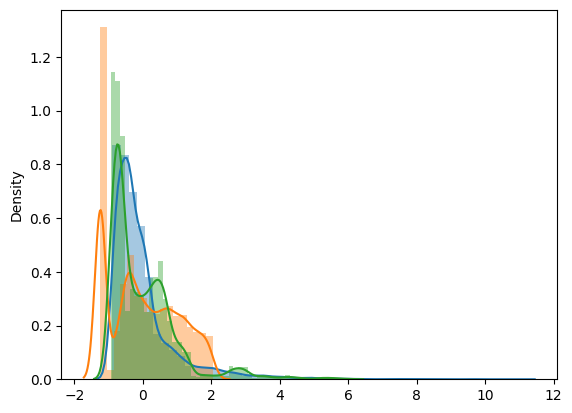

In [15]:
sns.distplot(x_standardized.T[0])
sns.distplot(x_standardized.T[1])
sns.distplot(x_standardized.T[2])

In [16]:
#transforma categoricos usando OneHotEncoder
encoder=OneHotEncoder(drop='first').fit(data_object)
encoded=encoder.transform(data_object).toarray()
encoded

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [17]:
X=np.concatenate((x_standardized,encoded),axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=195)

In [19]:
from sklearn import linear_model
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [20]:
predictions=lm.predict(X_train)

In [21]:
r2_score(y_train,predictions)

0.7777541284840594

In [22]:
predictions=lm.predict(X_test)

In [23]:
r2_score(y_test,predictions)

0.7593534402757884

In [ ]:
#Multicolinealidad

In [24]:
data_numeric

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [25]:
corr_data= data_numeric

In [27]:
correlation_matrix=corr_data.corr()
correlation_matrix

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount
CustomerLifetimeValue,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
MonthlyPremiumAuto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
MonthsSinceLastClaim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
MonthsSincePolicyInception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
NumberofOpenComplaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
NumberofPolicies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
TotalClaimAmount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<Axes: >

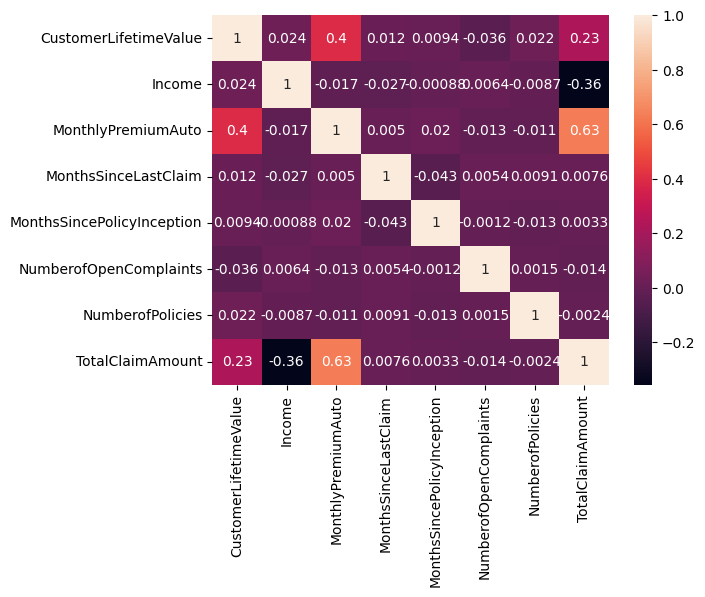

In [28]:
sns.heatmap(correlation_matrix,annot=True)

In [29]:
#eliminar columnas con baja correlacion para ver si mejora modelo

data_numeric=data_numeric.drop(['MonthsSinceLastClaim','MonthsSincePolicyInception','NumberofPolicies'],axis=1)

In [30]:
data_numeric

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,NumberofOpenComplaints,TotalClaimAmount
0,2763.519279,56274,69,0,384.811147
1,6979.535903,0,94,0,1131.464935
2,12887.431650,48767,108,0,566.472247
3,7645.861827,0,106,0,529.881344
4,2813.692575,43836,73,0,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,0,198.234764
9130,3096.511217,21604,79,0,379.200000
9131,8163.890428,0,85,3,790.784983
9132,7524.442436,21941,96,0,691.200000


In [32]:
#Transformar Data Numerica

y=data_numeric['TotalClaimAmount']

In [33]:
X_num= data_numeric.drop(['TotalClaimAmount'],axis=1)

In [34]:
X_num

,CustomerLifetimeValue,Income,MonthlyPremiumAuto,NumberofOpenComplaints
0,2763.519279,56274,69,0
1,6979.535903,0,94,0
2,12887.431650,48767,108,0
3,7645.861827,0,106,0
4,2813.692575,43836,73,0
...,...,...,...,...
9129,23405.987980,71941,73,0
9130,3096.511217,21604,79,0
9131,8163.890428,0,85,3
9132,7524.442436,21941,96,0


In [65]:
#MinMaxScaler

transformer=MinMaxScaler().fit(X_num)
x_minmax=transformer.transform(X_num)

<Axes: ylabel='Density'>

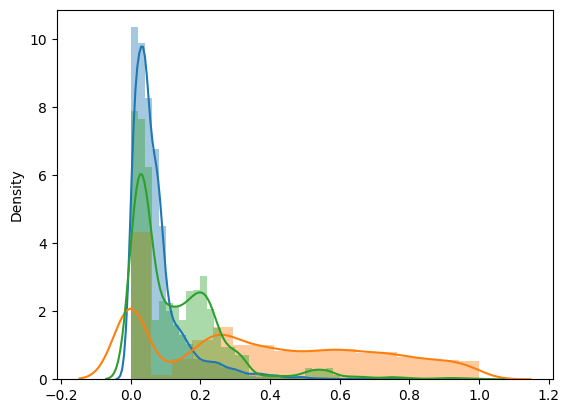

In [66]:
sns.distplot(x_minmax.T[0])
sns.distplot(x_minmax.T[1])
sns.distplot(x_minmax.T[2])

In [67]:

X=np.concatenate((x_minmax,encoded),axis=1)

In [68]:
X

array([[0.01062925, 0.56284694, 0.03375527, ..., 1.        , 1.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.        , 1.        ,
        0.        ],
       [0.13495982, 0.48776267, 0.19831224, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.        , 1.        ,
        0.        ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.        , 0.        ,
        0.        ],
       [0.00876645, 0.        , 0.06751055, ..., 1.        , 1.        ,
        0.        ]])

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=195)

In [70]:
#linear_model
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [71]:
predictions=lm.predict(X_train)

In [72]:
r2_score(y_train,predictions)

0.7775714752513593

In [73]:
predictions=lm.predict(X_test)

In [74]:
r2_score(y_test,predictions)

0.7593825862883068

<Axes: ylabel='Density'>

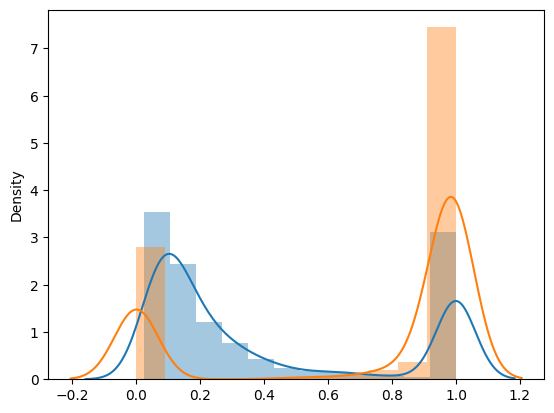

In [75]:
#Normalizer

transformer=Normalizer().fit(X_num)
x_normalized=transformer.transform(X_num)

sns.distplot(x_normalized.T[0])
sns.distplot(x_normalized.T[1])

In [76]:
X=np.concatenate((x_normalized,encoded),axis=1)

In [77]:
X

array([[0.04904913, 0.99879562, 0.00122467, ..., 1.        , 1.        ,
        0.        ],
       [0.99990932, 0.        , 0.01346672, ..., 0.        , 1.        ,
        0.        ],
       [0.25549399, 0.96680827, 0.00214111, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.99994574, 0.        , 0.01041114, ..., 0.        , 1.        ,
        0.        ],
       [0.32439152, 0.94591385, 0.00413872, ..., 0.        , 0.        ,
        0.        ],
       [0.99956571, 0.        , 0.02946836, ..., 1.        , 1.        ,
        0.        ]])

In [78]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: TotalClaimAmount, Length: 9134, dtype: float64

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=195)

In [80]:
#linear_model
lm=linear_model.LinearRegression().fit(X_train,y_train)

In [81]:
predictions=lm.predict(X_train)

In [82]:
r2_score(y_train,predictions)

0.7610150641945975